In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train=pd.read_excel('X_train.xlsx')
y_train=pd.read_excel('y_train.xlsx')
X_val=pd.read_excel('X_val.xlsx')
y_val=pd.read_excel('y_val.xlsx')
X_test=pd.read_excel('X_test.xlsx')

In [4]:
X_train.shape , y_train.shape , X_val.shape, y_val.shape , X_test.shape

((3198, 36), (3198, 1), (800, 36), (800, 1), (1500, 36))

## Fitment of other models with cross validation

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBRegressor

In [7]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

In [8]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ada=AdaBoostRegressor()
knn=KNeighborsRegressor()
nb=GaussianNB()
#xgb=XGBRegressor()

In [10]:
models=[]
models.append(('Linear',lr))
models.append(('DTR',dt))
models.append(('RFR',rfr))
models.append(('ADA',ada))
models.append(('GB',gb))
models.append(('KNN',knn))
models.append(('GNB',nb))

In [11]:
results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

Linear: 0.461521 (0.026421)
DTR: 0.681944 (0.041809)
RFR: 0.472560 (0.025375)
ADA: 0.507324 (0.028774)
GB: 0.469364 (0.022750)
KNN: 0.506626 (0.022889)
GNB: nan (nan)


## Using Feature selection techniques

### Wrapper Method- RFE

In [13]:
from sklearn.feature_selection import RFE

In [14]:
rfe=RFE(estimator=lr,step=1)

In [15]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [16]:
selected_rfe_features=pd.DataFrame({'Features':list(X_train.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Features,Ranking
0,10percentage,1
32,x1_Electronics,1
31,x1_Electrical,1
29,x1_Civil,1
28,x0_West,1
26,x0_Other,1
24,x0_East,1
22,CollegeID_cat,1
19,CollegeTier,1
16,Gender,1


18 features are selected. 

In [17]:
X_train_rfe=rfe.transform(X_train)

In [20]:
X_train_rfe.shape

(3198, 18)

In [21]:
X_val_rfe=rfe.transform(X_val)
X_test_rfe=rfe.transform(X_test)

#### Fitting the linear Regression model

In [22]:
lr.fit(X_train_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lr.score(X_train_rfe,y_train)

0.2675668794966337

In [24]:
lr.score(X_val_rfe,y_val)

0.2374764046826835

In [25]:
# Calcultaing RMSE

In [26]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,lr.predict(X_train_rfe),squared=False))

print(mean_squared_error(y_val,lr.predict(X_val_rfe),squared=False))

0.45848186183471923
0.5001724746272671


In [27]:
## Trying with all the models

In [28]:
results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train_rfe,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

Linear: 0.460660 (0.025628)
DTR: 0.676938 (0.015274)
RFR: 0.475343 (0.021995)
ADA: 0.498737 (0.017596)
GB: 0.469797 (0.019614)
KNN: 0.509032 (0.028025)
GNB: nan (nan)


After doing feature selection, the variance error for Gradient Boosting decreases and bias error remains the same

#### Applying RFE with decision tree as the estimator

In [29]:
rfedt=RFE(estimator=dt,step=1)

rfedt.fit(X_train,y_train)

selected_rfe_featuresdt=pd.DataFrame({'Features':list(X_train.columns),'Ranking':rfedt.ranking_})
print(selected_rfe_featuresdt.sort_values(by='Ranking'))

X_train_rfedt=rfedt.transform(X_train)

print(X_train_rfedt.shape)

X_val_rfedt=rfedt.transform(X_val)
X_test_rfedt=rfedt.transform(X_test)

#### Fitting the linear Regression model

lr.fit(X_train_rfedt,y_train)

lr.score(X_train_rfedt,y_train)

lr.score(X_val_rfedt,y_val)

# Calcultaing RMSE

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,lr.predict(X_train_rfedt),squared=False))

print(mean_squared_error(y_val,lr.predict(X_val_rfedt),squared=False))

## Trying with all the models

results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train_rfedt,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))



                 Features  Ranking
0            10percentage        1
22          CollegeID_cat        1
34          x1_Mechanical        1
14          Marks_Percent        1
13  openess_to_experience        1
12            nueroticism        1
11           extraversion        1
10          agreeableness        1
9       conscientiousness        1
15                BirthYr        1
7                   Quant        1
6                 Logical        1
5                 English        1
4          GraduationYear        1
3              collegeGPA        1
2            12percentage        1
8                  Domain        1
1            12graduation        1
33         x1_Information        2
31          x1_Electrical        3
19            CollegeTier        4
18                12board        5
25               x0_North        6
21        CollegeCityTier        7
30            x1_Computer        8
24                x0_East        9
32         x1_Electronics       10
26               x0_

With DT as estimator in the RFE, it does not perform better than the LR. Thus, we go with LR as the bas estimator for RFE

### Trying RFE CV

In [31]:
from sklearn.feature_selection import RFECV

In [50]:
rfecv=RFECV(estimator=lr,step=1,cv=5,scoring='neg_mean_squared_error')
rfecv.fit(X_train,y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [51]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best Features: ',X_train.columns[rfecv.support_])

Optimal number of features:  28
Best Features:  Index(['10percentage', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Quant', 'conscientiousness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Marks_Percent', 'BirthYr', 'Gender',
       '10board', 'CollegeTier', 'Degree', 'CollegeID_cat', 'x0_Central',
       'x0_East', 'x0_North', 'x0_Other', 'x0_West', 'x1_Civil', 'x1_Computer',
       'x1_Electrical', 'x1_Electronics', 'x1_Mechanical', 'x1_Other'],
      dtype='object')


In [52]:
rfecv.ranking_

array([1, 3, 1, 1, 1, 1, 4, 1, 6, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 8,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 9, 1, 1])

In [53]:
rfecv.support_

array([ True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True])

In [54]:
rfecv.grid_scores_

array([-0.27701863, -0.26624123, -0.25107086, -0.24242832, -0.23651292,
       -0.2319707 , -0.23118059, -0.22722092, -0.22659295, -0.22184717,
       -0.22181019, -0.21924181, -0.2188378 , -0.21694377, -0.21645249,
       -0.21553   , -0.21566461, -0.21572376, -0.21507635, -0.21475578,
       -0.21472303, -0.21472168, -0.21442423, -0.21416363, -0.21394863,
       -0.21408682, -0.213954  , -0.21387477, -0.21392932, -0.21399738,
       -0.2141431 , -0.21417759, -0.21418863, -0.21415496, -0.21414924,
       -0.21414928])

With RFECV, 28 features are selected

In [55]:
#Plotting the grid scores

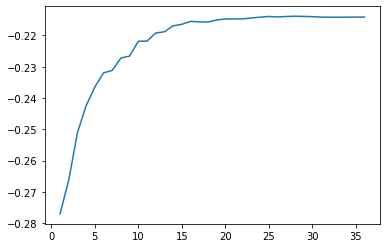

In [56]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

We observe that after 28 attributes, the mean squared error goes on increasing. Thus, with these selected features we can go ahead and fit the model check if it performs better.

In [57]:
X_train_rfecv=rfecv.transform(X_train)
X_val_rfecv=rfecv.transform(X_val)
X_test_rfecv=rfecv.transform(X_test)

### Fitting all the models

In [58]:
results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train_rfecv,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

Linear: 0.460643 (0.026288)
DTR: 0.677783 (0.022103)
RFR: 0.473762 (0.023731)
ADA: 0.503842 (0.018126)
GB: 0.469298 (0.021531)
KNN: 0.509822 (0.025243)
GNB: nan (nan)


1. Thus from above, we observe that the GB and LR perform the best with 18 features i.e. RFE
2. We shall further hyper tune the GB model and check if it gives better result.
3. Also, we can try with polynomial regression

### Hyperparameter tuning of Gradient Boost

In [65]:
GB_bias=[]
GB_var=[]
for n in np.arange(1,100):
    gb=GradientBoostingRegressor(n_estimators=n,random_state=3)
    scores=cross_val_score(gb,X_train_rfe,y_train,cv=5,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    GB_bias.append(np.mean(rmse))
    GB_var.append(np.std(rmse,ddof=1))

In [66]:
np.argmin(GB_bias),np.argmin(GB_var)

(52, 79)

In [67]:
gb=GradientBoostingRegressor(n_estimators=53,random_state=3)

In [68]:
kfold=KFold(shuffle=True,n_splits=5,random_state=3)
cv_results=cross_val_score(gb,X_train_rfe,y_train,cv=kfold,scoring='neg_mean_squared_error')
print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

GNB: 0.468014 (0.020604)


In [104]:
gb=GradientBoostingRegressor(n_estimators=53,random_state=3) 

In [105]:
gb.fit(X_train_rfe,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=53,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
gb.score(X_train_rfe,y_train)

0.3427157965852554

In [107]:
gb.score(X_val_rfe,y_val)

0.23577915581806597

### Trying the Polynomial Regression

In [108]:
from sklearn.preprocessing import PolynomialFeatures

In [112]:
poly=PolynomialFeatures(interaction_only=True)

In [113]:
X_train_poly=poly.fit_transform(X_train)

In [114]:
X_train_poly.shape

(3198, 667)

In [115]:
results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train_poly,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

Linear: 3089184380.976680 (1205771071.412266)
DTR: 0.684288 (0.014165)
RFR: 0.475280 (0.025089)
ADA: 0.514963 (0.026883)
GB: 0.474410 (0.020619)
KNN: 0.511880 (0.024676)
GNB: nan (nan)


Applying the Polynomial regression also doesn't make any change in the bias errors and variance errors values

### Applying RFECV on the Polynomial features.

In [116]:
rfecv.fit(X_train_poly,y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [119]:
print('Optimal number of features: ',rfecv.n_features_)
#print('Best Features: ',X_train_poly.columns[rfecv.support_])

Optimal number of features:  30


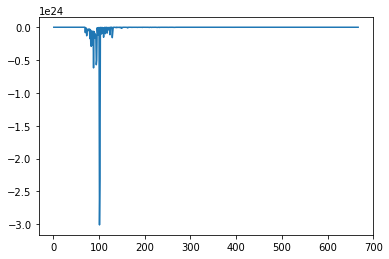

In [120]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [122]:
X_train_rfecvpoly=rfecv.transform(X_train_poly)

In [123]:
results = []
names = []
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=3)
    cv_results=cross_val_score(model,X_train_rfecvpoly,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

Linear: 0.473614 (0.020743)
DTR: 0.687381 (0.030489)
RFR: 0.496726 (0.018574)
ADA: 0.504083 (0.018409)
GB: 0.477354 (0.019587)
KNN: 0.515559 (0.028563)
GNB: nan (nan)


We see that with the Polynomial regression also the bias error doesn't decrease. Thus, we go with the model Gradient Boost Regressor with 53 estimators and 18 features

## Final Model

In [128]:
gb=GradientBoostingRegressor(n_estimators=53,random_state=3)
gb.fit(X_train_rfe,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=53,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
mean_squared_error(y_train,gb.predict(X_train_rfe),squared=False)

0.43432494081697764

In [130]:
mean_squared_error(y_val,gb.predict(X_val_rfe),squared=False)

0.5007288149872817

In [131]:
gb.score(X_train_rfe,y_train)

0.3427157965852554

In [132]:
gb.score(X_val_rfe,y_val)

0.23577915581806597

Thus, we see that model is underfit. 

In [133]:
y_pred=gb.predict(X_test_rfe)

In [134]:
y_pred

array([12.42015414, 12.63160095, 12.92136755, ..., 12.9238215 ,
       12.272448  , 12.25119408])

In [135]:
output=pd.DataFrame()

In [136]:
output['y_pred(log)']=y_pred

In [137]:
output['y_value']=np.exp(output['y_pred(log)'].values)

In [139]:
output

,y_pred(log),y_value
0,12.420154,247744.720897
1,12.631601,306079.743864
2,12.921368,408957.922519
3,12.256895,210427.144376
4,12.734205,339152.374660
...,...,...
1495,12.784851,356771.427560
1496,12.694446,325932.655065
1497,12.923822,409962.718499
1498,12.272448,213725.550540


In [140]:
output.to_excel('output_result.xlsx')

### Aplying K Means Clustering on the X_train
1. This can help us to figure out what kind of students are grouped in one cluster

In [197]:
X_train.head(2)

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,...,x0_Other,x0_South,x0_West,x1_Civil,x1_Computer,x1_Electrical,x1_Electronics,x1_Information,x1_Mechanical,x1_Other
0,-1.594729,-0.060884,-1.289013,-0.449715,0.298099,-0.025494,0.908879,-1.102470,-0.463084,0.666113,...,0,0,1,0,0,0,0,1,0,0
1,-0.988370,-3.734606,-2.677765,0.995427,-2.764775,2.023005,0.159326,2.383352,1.472533,1.002366,...,0,0,1,0,1,0,0,0,0,0


In [198]:
X_val.head(2)

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,...,x0_Other,x0_South,x0_West,x1_Civil,x1_Computer,x1_Electrical,x1_Electronics,x1_Information,x1_Mechanical,x1_Other
0,-0.48307,-1.897745,-0.274859,1.089969,-1.233338,0.403261,1.889064,-0.651364,1.103312,-1.385580,...,0,0,1,0,1,0,0,0,0,0
1,-0.36584,-0.060884,-0.759095,0.406565,1.063817,-0.025494,0.793563,-0.405306,0.511371,1.400731,...,0,0,0,0,1,0,0,0,0,0


In [199]:
X_test.head(2)

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,...,x0_Other,x0_South,x0_West,x1_Civil,x1_Computer,x1_Electrical,x1_Electronics,x1_Information,x1_Mechanical,x1_Other
0,-0.28095,0.551403,-0.028173,-0.598281,0.298099,0.069785,-0.474912,0.865994,-1.434721,0.169251,...,0,0,0,0,0,0,1,0,0,0
1,0.52753,0.551403,0.063192,-0.071547,1.063817,0.307982,1.197169,1.153062,-1.999073,0.666113,...,0,0,0,0,0,0,0,1,0,0


For clustering, we consider complete data i.e. train,validation and test and make clusters and try to draw insights

In [200]:
X=pd.concat([X_train,X_val,X_test],axis=0).reset_index(drop=True)

In [201]:
X.head(2)

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,...,x0_Other,x0_South,x0_West,x1_Civil,x1_Computer,x1_Electrical,x1_Electronics,x1_Information,x1_Mechanical,x1_Other
0,-1.594729,-0.060884,-1.289013,-0.449715,0.298099,-0.025494,0.908879,-1.102470,-0.463084,0.666113,...,0,0,1,0,0,0,0,1,0,0
1,-0.988370,-3.734606,-2.677765,0.995427,-2.764775,2.023005,0.159326,2.383352,1.472533,1.002366,...,0,0,1,0,1,0,0,0,0,0


In [202]:
X_df=pd.read_excel('df_X.xlsx')

In [203]:
X_df.drop('Unnamed: 0',axis=1,inplace=True)

In [204]:
X_df.head(2) ## Original Dataset (few values normalized)

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,collegeGPA,CollegeCityTier,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Marks_Percent,BirthYr,Region,Specialzn,CollegeID_cat
0,m,62.0,state board,2008,60.2,state board,2,UnderGrad,68.3,0,...,0.6223,0.365271,0.635023,0.211442,0.578594,47.83,1991,West,Information,high
1,f,68.0,state board,2002,45.0,state board,2,PostGrad,79.0,0,...,0.6941,0.677360,0.741163,0.745209,0.836878,82.78,1985,West,Computer,high


In [205]:
from sklearn.cluster import KMeans

In [206]:
num=['10percentage', '12graduation', '12percentage', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Marks_Percent', 'BirthYr']

In [207]:
kmeans=KMeans(random_state=3)

In [208]:
X_num=X[num]

In [210]:
X_num.head() #Standardised variables

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Marks_Percent,BirthYr
0,-1.594729,-0.060884,-1.289013,-0.449715,0.298099,-0.025494,0.908879,-1.102470,-0.463084,0.666113,-0.645100,1.227564,-1.190944,0.361779,0.081935,0.324087
1,-0.988370,-3.734606,-2.677765,0.995427,-2.764775,2.023005,0.159326,2.383352,1.472533,1.002366,0.944154,1.874249,2.000130,1.795304,3.457515,-3.115394
2,1.416858,-0.060884,0.766705,0.507860,0.298099,0.736738,1.600774,1.686188,1.368344,-0.281110,0.807424,0.252514,0.452356,0.608678,1.396431,-0.249160
3,-1.998969,-1.285458,-2.476761,0.455187,-0.467620,-1.025924,-1.120681,-1.061461,0.964310,1.202413,1.712460,1.663465,0.008226,0.234658,1.096058,-0.249160
4,-0.584130,-0.673171,0.154558,-0.041834,-0.467620,0.069785,0.389957,0.250849,1.037720,0.176291,1.712460,1.663465,0.183924,0.851591,1.203265,0.324087


In [211]:
from sklearn.metrics import silhouette_score

In [212]:
wcss=[]
sil_score=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_num)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(X_num,kmeans.labels_))
print(wcss,'\n',sil_score)

[74943.83167869432, 68335.78353249682, 63723.255259594785, 60887.64993326664, 58772.04869119885, 57031.97783432402, 55605.942800544726, 54412.09084817398, 53313.8953687052, 52495.571601086136, 51627.621707131875, 50962.707837991, 50297.7080521722] 
 [0.13248293544889886, 0.11716975644451079, 0.10556321128866632, 0.09531891168498856, 0.08815175826907559, 0.08595498915178416, 0.08298872849217015, 0.08240487903937661, 0.07975287657578577, 0.07773978804838015, 0.0783443654380423, 0.07429954574936659, 0.07413398030820383]


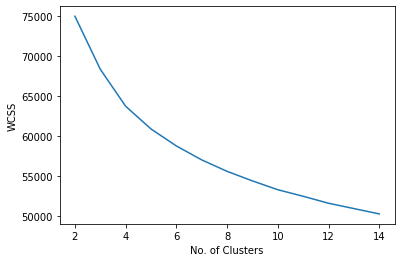

In [213]:
# Inertia
plt.plot(range(2,15),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

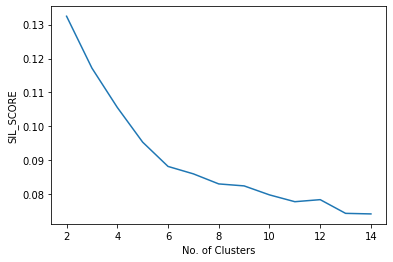

In [214]:
# Silhoute Score
plt.plot(range(2,15),sil_score)
plt.xlabel('No. of Clusters')
plt.ylabel('SIL_SCORE')
plt.show()

From both the graphs, we can say that 4 clusters is a good number of clusters

In [236]:
kmeans=KMeans(n_clusters=2,random_state=3)

In [237]:
kmeans.fit(X_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [238]:
pd.Series(kmeans.labels_).value_counts()

1    2962
0    2536
dtype: int64

plt.figure(figsize=[8,6])
sns.scatterplot(x=X_num,y=X_num,hue=kmeans.labels_,palette='summer')
plt.show()

In [239]:
pd.DataFrame(kmeans.cluster_centers_,columns=X_num.columns)

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Marks_Percent,BirthYr
0,-0.546179,-0.394793,-0.518895,-0.402487,-0.329935,-0.521554,-0.558575,-0.505055,-0.455060,-0.221892,-0.262514,-0.089703,0.330735,-0.119830,-0.457141,-0.383204
1,0.518400,0.335180,0.493304,0.384505,0.285431,0.429516,0.484858,0.421301,0.387464,0.138777,0.228502,0.103148,-0.222004,0.112715,0.392471,0.330280


We observe that the centroids of the below features are far from eachother - English,Logical, Quant, Domain, agreeableness, nueroticism, openess to experience, Marks Percent

#### Attaching the labels to original dataset

In [240]:
X_df['labels']=kmeans.labels_

In [241]:
X_df.groupby('labels').median().T

labels,0,1
10percentage,73.000000,84.000000
12graduation,2008.000000,2009.000000
12percentage,68.000000,80.000000
CollegeTier,2.000000,2.000000
collegeGPA,68.600000,74.415000
CollegeCityTier,0.000000,0.000000
GraduationYear,2012.000000,2013.000000
English,445.000000,545.000000
Logical,455.000000,545.000000
Quant,455.000000,570.000000
